In [28]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt  

import seaborn as sns

In [29]:
file_path = ("data/processed/DDos.csv")

data = pd.read_csv(file_path)

data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66237 entries, 0 to 66236
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             66237 non-null  int64  
 1    Flow Duration                66237 non-null  int64  
 2    Total Fwd Packets            66237 non-null  int64  
 3    Total Backward Packets       66237 non-null  int64  
 4   Total Length of Fwd Packets   66237 non-null  int64  
 5    Total Length of Bwd Packets  66237 non-null  int64  
 6    Fwd Packet Length Max        66237 non-null  int64  
 7    Fwd Packet Length Min        66237 non-null  int64  
 8    Fwd Packet Length Mean       66237 non-null  float64
 9    Fwd Packet Length Std        66237 non-null  float64
 10  Bwd Packet Length Max         66237 non-null  int64  
 11   Bwd Packet Length Min        66237 non-null  int64  
 12   Bwd Packet Length Mean       66237 non-null  float64
 13   

In [31]:
data[' Label'].value_counts()

 Label
DDoS      34952
BENIGN    31284
Name: count, dtype: int64

In [32]:
data.columns = data.columns.str.strip()

In [33]:
data.isnull().sum()

Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
Idle Std                       1
Idle Max                       1
Idle Min                       1
Label                          1
Length: 79, dtype: int64

In [34]:
import pandas as pd
import numpy as np

# Assuming your dataframe is named 'data'

# Check for null values
null_counts = data.isnull().sum()
total_null = null_counts.sum()

print("Columns with null values:")
print(null_counts[null_counts > 0])
print(f"\nTotal number of null values: {total_null}")

# Calculate percentage of null values
null_percentage = (null_counts / len(data)) * 100

print("\nPercentage of null values in each column:")
print(null_percentage[null_percentage > 0])

# Remove rows with null values
data_cleaned = data.dropna()

# Print information about the cleaning process
rows_removed = len(data) - len(data_cleaned)
print(f"\nRows removed: {rows_removed}")
print(f"Percentage of data removed: {(rows_removed / len(data)) * 100:.2f}%")

# Update the original dataframe
data = data_cleaned

print(f"\nShape of dataframe after removing null values: {data.shape}")

# Display the first few rows of the cleaned dataframe
print("\nFirst few rows of the cleaned dataframe:")
print(data.head())

# Verify that there are no more null values
print("\nVerifying null values after cleaning:")
print(data.isnull().sum().sum())

Columns with null values:
Fwd URG Flags              1
Bwd URG Flags              1
Fwd Header Length          1
Bwd Header Length          1
Fwd Packets/s              1
Bwd Packets/s              1
Min Packet Length          1
Max Packet Length          1
Packet Length Mean         1
Packet Length Std          1
Packet Length Variance     1
FIN Flag Count             1
SYN Flag Count             1
RST Flag Count             1
PSH Flag Count             1
ACK Flag Count             1
URG Flag Count             1
CWE Flag Count             1
ECE Flag Count             1
Down/Up Ratio              1
Average Packet Size        1
Avg Fwd Segment Size       1
Avg Bwd Segment Size       1
Fwd Header Length.1        1
Fwd Avg Bytes/Bulk         1
Fwd Avg Packets/Bulk       1
Fwd Avg Bulk Rate          1
Bwd Avg Bytes/Bulk         1
Bwd Avg Packets/Bulk       1
Bwd Avg Bulk Rate          1
Subflow Fwd Packets        1
Subflow Fwd Bytes          1
Subflow Bwd Packets        1
Subflow Bwd Bytes

In [35]:
list(data.columns)

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'UR

In [36]:
features_to_remove = [
    'Destination Port'
]

data = data.drop(columns=features_to_remove)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66236 entries, 0 to 66235
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                66236 non-null  int64  
 1   Total Fwd Packets            66236 non-null  int64  
 2   Total Backward Packets       66236 non-null  int64  
 3   Total Length of Fwd Packets  66236 non-null  int64  
 4   Total Length of Bwd Packets  66236 non-null  int64  
 5   Fwd Packet Length Max        66236 non-null  int64  
 6   Fwd Packet Length Min        66236 non-null  int64  
 7   Fwd Packet Length Mean       66236 non-null  float64
 8   Fwd Packet Length Std        66236 non-null  float64
 9   Bwd Packet Length Max        66236 non-null  int64  
 10  Bwd Packet Length Min        66236 non-null  int64  
 11  Bwd Packet Length Mean       66236 non-null  float64
 12  Bwd Packet Length Std        66236 non-null  float64
 13  Flow Bytes/s         

In [38]:
# Create binary labels
data['BinaryLabel'] = (data['Label'] != 'BENIGN').astype(int)

# Print the distribution
print(data['BinaryLabel'].value_counts(normalize=True))

BinaryLabel
1    0.527689
0    0.472311
Name: proportion, dtype: float64


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66236 entries, 0 to 66235
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                66236 non-null  int64  
 1   Total Fwd Packets            66236 non-null  int64  
 2   Total Backward Packets       66236 non-null  int64  
 3   Total Length of Fwd Packets  66236 non-null  int64  
 4   Total Length of Bwd Packets  66236 non-null  int64  
 5   Fwd Packet Length Max        66236 non-null  int64  
 6   Fwd Packet Length Min        66236 non-null  int64  
 7   Fwd Packet Length Mean       66236 non-null  float64
 8   Fwd Packet Length Std        66236 non-null  float64
 9   Bwd Packet Length Max        66236 non-null  int64  
 10  Bwd Packet Length Min        66236 non-null  int64  
 11  Bwd Packet Length Mean       66236 non-null  float64
 12  Bwd Packet Length Std        66236 non-null  float64
 13  Flow Bytes/s         

In [40]:
# Remove rows with NaN or infinity values
data_cleaned = data.replace([np.inf, -np.inf], np.nan).dropna()

print(f"Original shape: {data.shape}")
print(f"Shape after removing NaN and infinity rows: {data_cleaned.shape}")

Original shape: (66236, 79)
Shape after removing NaN and infinity rows: (66236, 79)


In [41]:
""" # Identify columns with only zeros
zero_columns = data_cleaned.columns[(data_cleaned == 0).all()].tolist()

# Remove these columns
data_cleaned = data_cleaned.drop(columns=zero_columns)

print(f"Columns removed (containing only zeros): {zero_columns}")
print(f"Shape after removing zero columns: {data_cleaned.shape}") """

' # Identify columns with only zeros\nzero_columns = data_cleaned.columns[(data_cleaned == 0).all()].tolist()\n\n# Remove these columns\ndata_cleaned = data_cleaned.drop(columns=zero_columns)\n\nprint(f"Columns removed (containing only zeros): {zero_columns}")\nprint(f"Shape after removing zero columns: {data_cleaned.shape}") '

In [42]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66236 entries, 0 to 66235
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow Duration                66236 non-null  int64  
 1   Total Fwd Packets            66236 non-null  int64  
 2   Total Backward Packets       66236 non-null  int64  
 3   Total Length of Fwd Packets  66236 non-null  int64  
 4   Total Length of Bwd Packets  66236 non-null  int64  
 5   Fwd Packet Length Max        66236 non-null  int64  
 6   Fwd Packet Length Min        66236 non-null  int64  
 7   Fwd Packet Length Mean       66236 non-null  float64
 8   Fwd Packet Length Std        66236 non-null  float64
 9   Bwd Packet Length Max        66236 non-null  int64  
 10  Bwd Packet Length Min        66236 non-null  int64  
 11  Bwd Packet Length Mean       66236 non-null  float64
 12  Bwd Packet Length Std        66236 non-null  float64
 13  Flow Bytes/s         

In [43]:
from sklearn.feature_selection import mutual_info_classif

# Prepare features and target
X = data_cleaned.drop(['Label', 'BinaryLabel'], axis=1)
y_binary = data_cleaned['BinaryLabel']

# Calculate mutual information
mi_scores = mutual_info_classif(X, y_binary)

# Create a dataframe of features and their mutual information scores
mi_df = pd.DataFrame({'feature': X.columns, 'mi_score': mi_scores})
mi_df = mi_df.sort_values('mi_score', ascending=False)

# Select top 30 features (you can adjust this number)
top_features = mi_df['feature'][:30].tolist()

# Create a new dataframe with selected features and binary label
selected_features = top_features + ['BinaryLabel']
data_selected = data_cleaned[selected_features]

print("\nSelected features:", selected_features)


Selected features: ['Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Average Packet Size', 'Fwd Header Length', 'Fwd Header Length.1', 'Bwd Packet Length Mean', 'Avg Bwd Segment Size', 'Subflow Bwd Bytes', 'Total Length of Bwd Packets', 'Init_Win_bytes_forward', 'Bwd Packet Length Max', 'Avg Fwd Segment Size', 'Fwd Packet Length Mean', 'Fwd Packet Length Max', 'Fwd IAT Max', 'Bwd Header Length', 'Packet Length Mean', 'Fwd IAT Total', 'Fwd IAT Mean', 'Packet Length Variance', 'Packet Length Std', 'Fwd IAT Std', 'Subflow Fwd Packets', 'Total Fwd Packets', 'act_data_pkt_fwd', 'Init_Win_bytes_backward', 'Max Packet Length', 'Fwd Packets/s', 'Flow Duration', 'Bwd Packets/s', 'BinaryLabel']


In [44]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data_selected.drop('BinaryLabel', axis=1)
y = data_selected['BinaryLabel']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [45]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, stratify=y, random_state=42
)

print("\nData split sizes:")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")



Data split sizes:
Training set: (52988, 30)
Testing set: (13248, 30)


In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
# Reshape input to be 3D [samples, time steps, features] for LSTM
X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (52988, 1, 30)
Testing data shape: (13248, 1, 30)


In [48]:
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# Create the model
model = create_lstm_model((X_train.shape[1], X_train.shape[2]))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             24320     
                                                                 
 dropout_2 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 37281 (145.63 KB)
Trainable params: 3728

In [49]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
1325/1325 [==============================] - 29s 11ms/step - loss: 0.0760 - accuracy: 0.9724 - val_loss: 0.0219 - val_accuracy: 0.9940
Epoch 2/50
1325/1325 [==============================] - 10s 7ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0101 - val_accuracy: 0.9969
Epoch 3/50
1325/1325 [==============================] - 9s 7ms/step - loss: 0.0095 - accuracy: 0.9974 - val_loss: 0.0097 - val_accuracy: 0.9989
Epoch 4/50
1325/1325 [==============================] - 10s 7ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.0082 - val_accuracy: 0.9974
Epoch 5/50
1325/1325 [==============================] - 10s 8ms/step - loss: 0.0068 - accuracy: 0.9983 - val_loss: 0.0059 - val_accuracy: 0.9986
Epoch 6/50
1325/1325 [==============================] - 10s 8ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0044 - val_accuracy: 0.9991
Epoch 7/50
1325/1325 [==============================] - 10s 8ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.0072 - val_ac

In [50]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.0034
Test Accuracy: 0.9992


In [51]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

414/414 [==============================] - 3s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6257
           1       1.00      1.00      1.00      6991

    accuracy                           1.00     13248
   macro avg       1.00      1.00      1.00     13248
weighted avg       1.00      1.00      1.00     13248



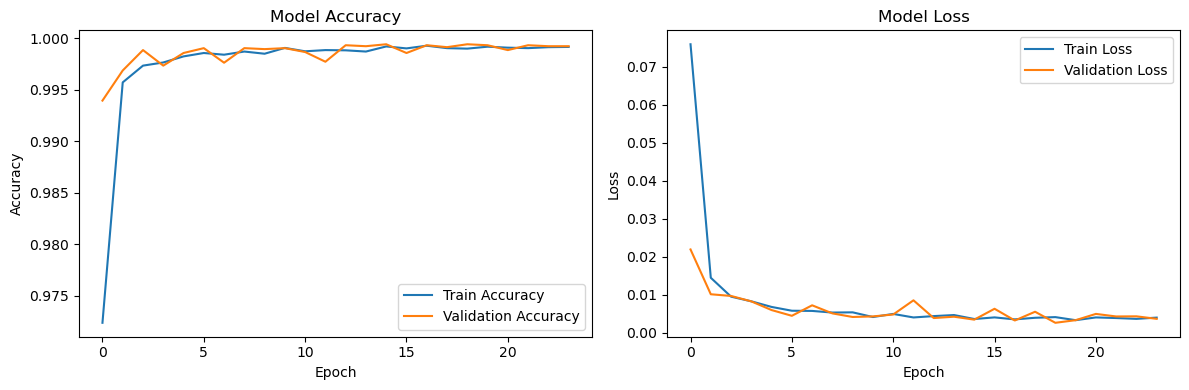

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(122)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_test and y_pred_classes are already defined
cm = confusion_matrix(y_test, y_pred_classes)

# Extract values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate additional metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp)

# Print results
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score: {f1_score:.4f}")

True Negatives (TN): 6253
False Positives (FP): 4
False Negatives (FN): 6
True Positives (TP): 6985

Accuracy: 0.9992
Precision: 0.9994
Recall (Sensitivity): 0.9991
Specificity: 0.9994
F1-score: 0.9993
